## Clustering: Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

In this document, we discussed one of the most famous clustering algorithms – K-Means. We implemented it from scratch and looked at its step-by-step implementation. We also looked at the elbow curve which helps to find the optimum number of clusters in the K-Means algorithm.

In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem. 

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
#Replacing strings with numbers for Gender and Exercise Angina
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]
ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [4]:
# Project only necessary Sex and separate target feature for training data
cluster_df = heart[['Age', 'Sex', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak', 'ExerciseAngina', 'Cholesterol']] # THIS IS X
label_df = heart['HeartDisease'] # THIS IS Y
cluster_df.head(4)

,Age,Sex,RestingBP,FastingBS,MaxHR,Oldpeak,ExerciseAngina,Cholesterol
0,40,1,140,0,172,0.0,0,289
1,49,0,160,0,156,1.0,0,180
2,37,1,130,0,98,0.0,0,283
3,48,0,138,0,108,1.5,1,214


In [5]:
# Scale the data
scaler = StandardScaler()
scaled_data= scaler.fit_transform(cluster_df)
scaled_data

array([[-1.4331398 ,  0.51595242,  0.41090889, ..., -0.83243239,
        -0.8235563 ,  0.82507026],
       [-0.47848359, -1.93816322,  1.49175234, ...,  0.10566353,
        -0.8235563 , -0.17196105],
       [-1.75135854,  0.51595242, -0.12951283, ..., -0.83243239,
        -0.8235563 ,  0.7701878 ],
       ...,
       [ 0.37009972,  0.51595242, -0.12951283, ...,  0.29328271,
         1.21424608, -0.62016778],
       [ 0.37009972, -1.93816322, -0.12951283, ..., -0.83243239,
        -0.8235563 ,  0.34027522],
       [-1.64528563,  0.51595242,  0.30282455, ..., -0.83243239,
        -0.8235563 , -0.21769643]])

In [6]:
# Create a new dataframe with the transormed data
scaled_df=pd.DataFrame(scaled_data, columns=cluster_df.columns[0:])
scaled_df

,Age,Sex,RestingBP,FastingBS,MaxHR,Oldpeak,ExerciseAngina,Cholesterol
0,-1.433140,0.515952,0.410909,-0.551341,1.382928,-0.832432,-0.823556,0.825070
1,-0.478484,-1.938163,1.491752,-0.551341,0.754157,0.105664,-0.823556,-0.171961
2,-1.751359,0.515952,-0.129513,-0.551341,-1.525138,-0.832432,-0.823556,0.770188
3,-0.584556,-1.938163,0.302825,-0.551341,-1.132156,0.574711,1.214246,0.139040
4,0.051881,0.515952,0.951331,-0.551341,-0.581981,-0.832432,-0.823556,-0.034755
...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,-1.210356,-0.551341,-0.188999,0.293283,-0.823556,0.596393
914,1.536902,0.515952,0.627078,1.813758,0.164684,2.357094,-0.823556,-0.053049
915,0.370100,0.515952,-0.129513,-0.551341,-0.857069,0.293283,1.214246,-0.620168
916,0.370100,-1.938163,-0.129513,-0.551341,1.461525,-0.832432,-0.823556,0.340275


In [8]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA
# model, it is possible to state the desired explained variance.
pca = PCA(n_components=0.85) # 0.9 = 7 features
# get principal components for the data
pca_cluster_data = pca.fit_transform(scaled_df)

In [9]:
pca_cluster_data.shape

(918, 6)

In [10]:
#  run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_cluster_data)

In [11]:
# The dataset has 2 columns -- got compressed
tsne_features.shape

(918, 2)

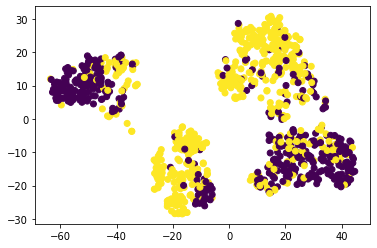

In [12]:
# Visualize the clusters
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=label_df.values)
plt.show()
#multiples

In [31]:
# # Initializing model with K=5 (clearly we have 5 clusters above)
# model = KMeans(n_clusters=5, random_state=10)

In [36]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

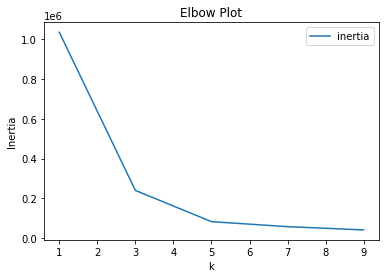

<Figure size 432x288 with 0 Axes>

In [23]:
inertia = []
# Same as k = list(range(1, 11))
k = list(range(1,10,2))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
# df_elbow.hvplot.line(x = 'k', y = 'inertia', titles = 'clusters')

elbow_heart_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_heart_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

plt.savefig("elbow.jpg", dpi = 100)

In [ ]:
#The variables that could predict heart failure could be clustered together into 3 clusters to create a classification system for
#heart failure prediction purposes. My conclusion is based on the k-means algorithm which is an unsupervised clustering algorithm. 
#The data is grouped into 3 distinct groups which provides greater clarity.
#We don’t know whats in these 3 dgroups but we will be able to use this info to conduct further research on predicting heart failure.

### Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [16]:
# Predicting clusters with k=4
from sklearn.cluster import KMeans

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data


# # Initialize the k-means model
# model = KMeans(n_clusters=3, random_state=10)

# # Fit the model
# model.fit(pca_cluster_heart_data)

# # Predict clusters
# predictions = model.predict(pca_cluster_heart_data)

# # Add the predicted class column to the dataframe
# pca_cluster_heart_data["class"] = model.labels_
# pca_cluster_heart_data.head()

In [17]:
clusters = get_clusters(4, pd.DataFrame(tsne_features))
clusters

,0,1,class
0,39.275394,-18.942900,1
1,-55.512508,14.856096,2
2,28.083496,-18.036617,1
3,-39.118790,16.165144,2
4,17.281393,-9.966252,1
...,...,...,...
913,31.728767,-3.085989,1
914,-9.180921,-13.212041,0
915,7.168620,13.910880,3
916,-51.479530,12.435497,2


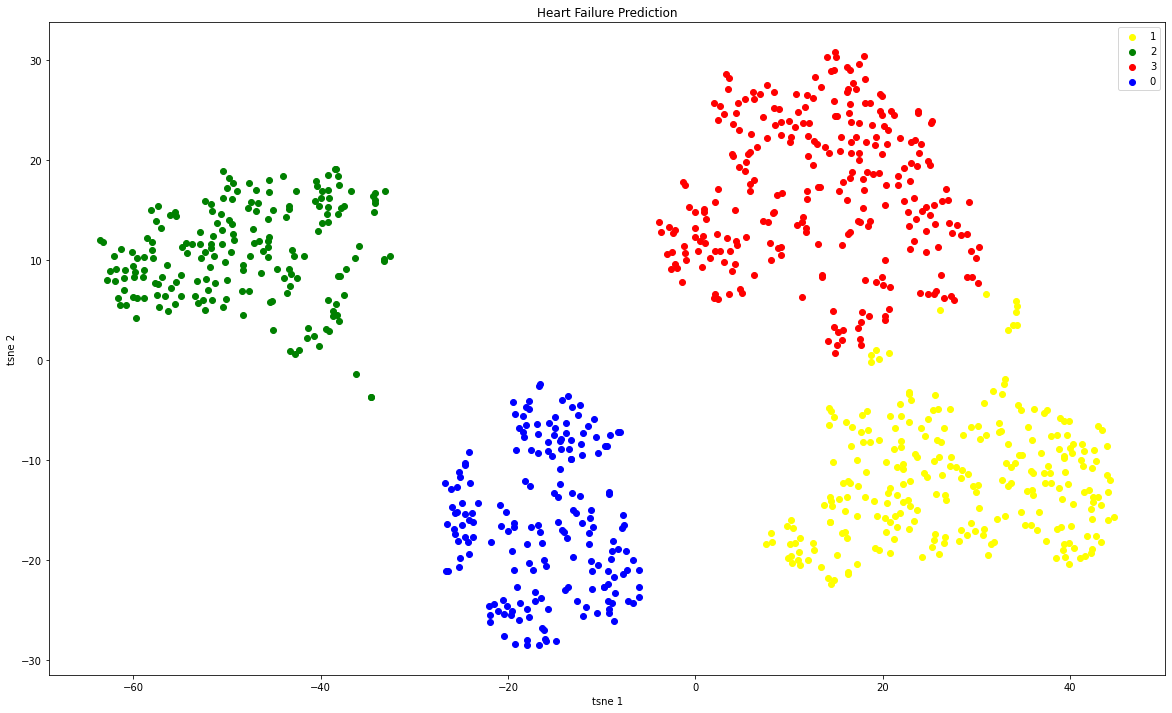

<Figure size 432x288 with 0 Axes>

In [24]:
# Visualize the clusters
# def show_clusters(pca_cluster_heart_data):
#     plt.scatter(df['Annual Income'], df['Spending Score'], c=clusters['class'])
#     plt.xlabel('Annual Income')
#     plt.ylabel('Spending Score')
#     plt.show()

colors = {0: 'blue', 1: 'yellow', 2: 'green', 3:'red', 4:'purple'}

fig, ax = plt.subplots(figsize=(20,12))
for n in clusters['class'].unique():
    temp_df = clusters.loc[ clusters['class'] == n]
    ax.scatter(x=temp_df[0], y=temp_df[1], c=colors[n], label=n)

# plt.scatter(x=clusters[0], y=clusters[1], c=clusters['class'], label=clusters['class'])
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.title('Heart Failure Prediction')
plt.legend()
plt.show()
plt.savefig("tsne_clusters.png", dpi = 100)